# **PREDICTION MODEL FOR FAILED TO PAY CUSTOMER**
**Review period**
1. Customer reviewed for the last year
2. Customer reviewed for the last 6 months

**Variable adjustments**
1. Balance viewed by the average during time horizon & view any change in the end of review and the beginning of review
2. Look at products ownership mean, max, and min during review period
3. customer active status viewed in month

# Package Import

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score,\
precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from jcopml.feature_importance import mean_score_decrease

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
path_all = "FinanKu Data All.csv"
path_val = "FinanKu Data Validasi.csv"
df_all = pd.read_csv(path_all)
df_1 = pd.read_csv(path_all)
df_2 = pd.read_csv(path_all)
df_val = pd.read_csv(path_val)

Experiment 1 dataset

In [39]:
df_1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


Experiment 2 dataset

In [40]:
df_2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


Validation dataset

In [41]:
df_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


**Data Understanding**\
Customer data based on location
- all data
- failed to pay data

In [42]:
#both paid and unpaid
data_all = pd.DataFrame(
    df_all.groupby(by=["City"])["Customer ID"]
    .count()
    .sort_values(ascending=False)
    .reset_index(name="Distribution by City")
)

data_all

,City,Distribution by City
0,Surabaya,3767
1,Bandung,1898
2,Jakarta,1896


In [43]:
data_unpaid = pd.DataFrame(
    df_all[df_all["Unpaid Tagging"] == 1].groupby(["City"])["Customer ID"]
    .count()
    .reset_index(name="Distribution by city")
)

data_unpaid

,City,Distribution by city
0,Bandung,496
1,Jakarta,490
2,Surabaya,1033


**Data Understanding**\
Customer data based on age
- all customer
- failed to pay customer

<Axes: title={'center': 'Cust. Distribution by Age'}, xlabel='Age', ylabel='# People'>

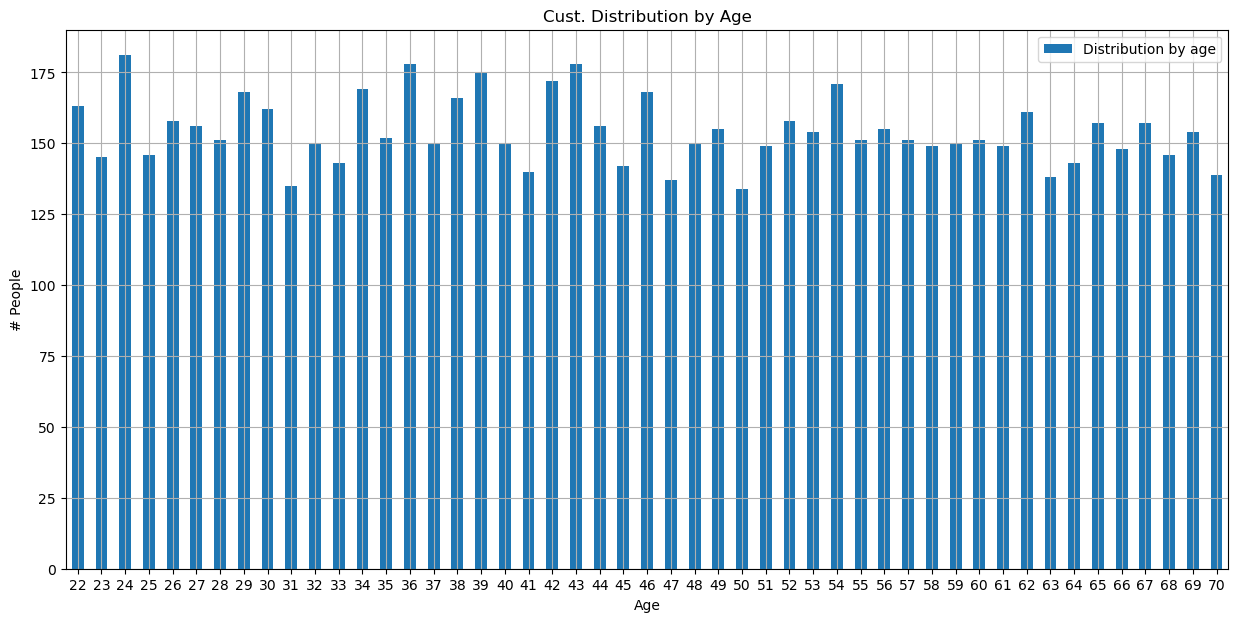

In [44]:
data_all_age = pd.DataFrame(
    df_all.groupby(by=["Age"])["Customer ID"]
    .count()
    .sort_values(ascending=False)
    .reset_index(name="Distribution by age")
)

data_all_age.sort_values(
    by="Age",
    ascending=True,
    inplace=True
)

data_all_age.plot(
    x="Age",
    y=["Distribution by age"],
    kind='bar',
    grid=True,
    xlabel="Age",
    ylabel="# People",
    figsize=(15, 7),
    title="Cust. Distribution by Age",
    table = False,
    rot=0
)

<Axes: title={'center': 'Unpaid Cust. Distribtution By Age'}, xlabel='Age', ylabel='# people'>

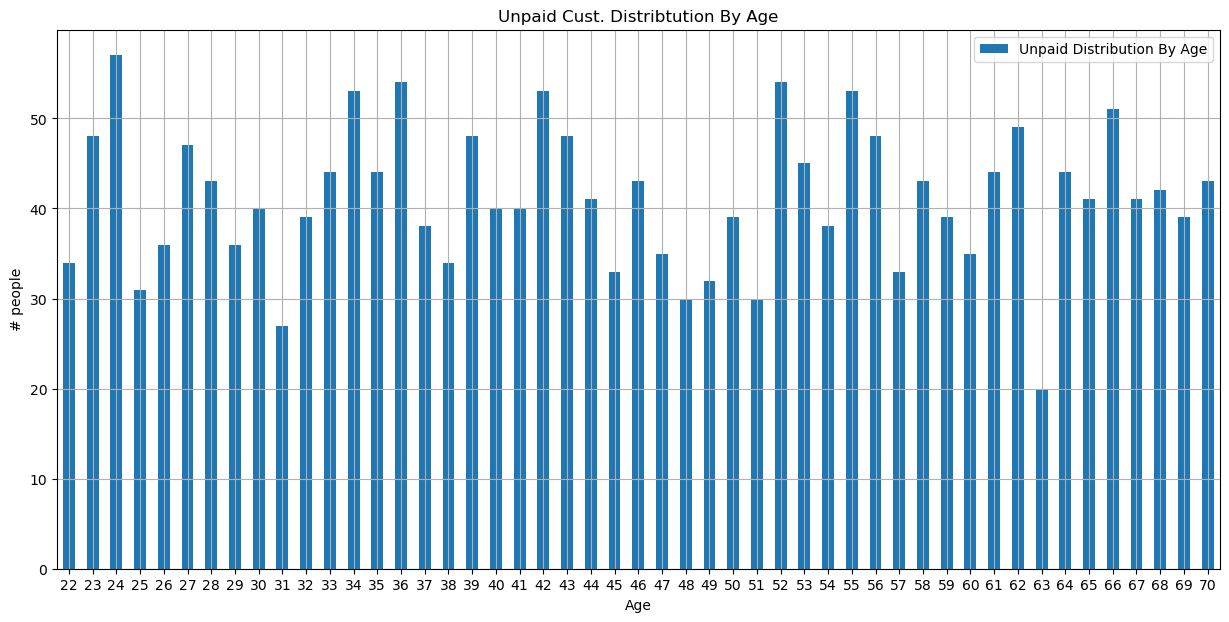

In [45]:
data_unpaid_age = pd.DataFrame(
    df_all[df_all["Unpaid Tagging"]==1].groupby(by=["Age"])["Customer ID"]
    .count()
    .reset_index(name="Unpaid Distribution By Age")
)

data_unpaid_age.sort_values(
    by="Age",
    ascending=True,
    inplace=True
)

data_unpaid_age.plot(
    x="Age",
    y="Unpaid Distribution By Age",
    kind="bar",
    grid=True,
    xlabel="Age",
    ylabel="# people",
    rot = 0,
    title="Unpaid Cust. Distribtution By Age",
    figsize=(15, 7)
)

# Customer average balance

In [46]:
df_checkbalance = df_all

df_checkbalance["Total Balance"] = df_checkbalance["Balance Q1"] + df_checkbalance["Balance Q2"] + df_checkbalance["Balance Q3"] + df_checkbalance["Balance Q4"]
df_checkbalance["Avg Balance"] = (df_checkbalance["Balance Q1"] + df_checkbalance["Balance Q2"] + df_checkbalance["Balance Q3"] + df_checkbalance["Balance Q4"])/4

df_checkbalance.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Total Balance,Avg Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,1187036.18,296759.045
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.000
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,1351820.24,337955.060
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.000
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,1110096.36,277524.090


In [47]:
data_balance = pd.DataFrame(
    df_checkbalance.groupby(by=["Unpaid Tagging"])["Total Balance"]
    .mean()
    .reset_index(name="Avg annual balance")
)

data_balance

,Unpaid Tagging,Avg annual balance
0,0,1.985924e+08
1,1,2.527238e+08


In [48]:
data_balance_quarterly = pd.DataFrame(
    df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg Balance"]
    .mean()
    .reset_index(name="Avg Quarterly Balance")
)

data_balance_quarterly

,Unpaid Tagging,Avg Quarterly Balance
0,0,4.964809e+07
1,1,6.318095e+07


# Average products ownership

In [49]:
df_checkbalance["Avg Products"] = (df_checkbalance["NumOfProducts Q1"] + df_checkbalance["NumOfProducts Q2"] + df_checkbalance["NumOfProducts Q3"] + df_checkbalance["NumOfProducts Q4"])/4

data_product_avg = pd.DataFrame(
    df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg Balance"]
    .mean()
    .reset_index(name="Avg Products Owned")
)
data_product_avg

,Unpaid Tagging,Avg Products Owned
0,0,4.964809e+07
1,1,6.318095e+07


# **Data Preparation**
check duplicate and missing data

In [50]:
df_all.duplicated().sum()

0

In [51]:
df_all.isnull().sum()

Customer ID                 0
Branch Code                 0
City                        0
Age                         0
Avg. Annual Income/Month    0
Balance Q1                  0
NumOfProducts Q1            0
HasCrCard Q1                0
ActiveMember Q1             0
Balance Q2                  0
NumOfProducts Q2            0
HasCrCard Q2                0
ActiveMember Q2             0
Balance Q3                  0
NumOfProducts Q3            0
HasCrCard Q3                0
ActiveMember Q3             0
Balance Q4                  0
NumOfProducts Q4            0
HasCrCard Q4                0
ActiveMember Q4             0
Unpaid Tagging              0
Total Balance               0
Avg Balance                 0
Avg Products                0
dtype: int64

# Adding relevant variable

Look for customer balance:
1. Experiment 1: Average customer balance in the last 1 year & balance changing on Q4 against Q1
2. Experiment 2: Average customer balance in the last six months & balance changing on Q4 against Q2

Experiment 1

In [52]:
df_1["Mean Balance"] = (df_1["Balance Q1"] + df_1["Balance Q2"] + df_1["Balance Q3"] + df_1["Balance Q4"])/4
df_1["Delta Balance"] = df_1["Balance Q4"] - df_1["Balance Q1"]

In [53]:
df_1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68


In [54]:
df_2["Mean Balance"] = (df_2["Balance Q3"] + df_2["Balance Q4"]) / 2    
df_2["Delta Balance"] = df_2["Balance Q4"] = df_2["Balance Q2"]

df_2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,0.0,1,1,1,1,593518.09,0.0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,0.0,2,1,1,0,675910.12,0.0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,0.0,2,1,1,0,555048.18,0.0


**Active Status**
Observe customer active status
1. Experiment 1: customer active status (in month) in the last one year
2. Experiment 2: customer active status (in mont) in the last 6 months

In [55]:
df_1["Active Months"] = (df_1["ActiveMember Q1"] + df_1["ActiveMember Q2"] + df_1["ActiveMember Q3"] + df_1["ActiveMember Q4"])* 3

df_1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6


In [56]:
df_2["active Months"] = (df_2["ActiveMember Q3"] + df_2["ActiveMember Q4"])* 3
df_2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,0.0,1,1,1,1,593518.09,0.0,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,0.0,2,1,1,0,675910.12,0.0,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,0.0,2,1,1,0,555048.18,0.0,6


# Addition and substraction product holding
Observe customer possession fluctuation in observation period

In [57]:
df_1["Diff PH"] = df_1["NumOfProducts Q4"] - df_1["NumOfProducts Q1"]

df_1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0


In [58]:
df_2["Diff PH"] = df_2["NumOfProducts Q4"] - df_2["NumOfProducts Q2"]

df_2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,0.0,1,1,1,1,593518.09,0.0,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,0.0,2,1,1,0,675910.12,0.0,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,0.0,2,1,1,0,555048.18,0.0,6,0


# Length of creditcard ownership

In [59]:
#function to give the lenght of cr card ownership
def assign_cr1(df):
    cr = (df["HasCrCard Q1"] + df["HasCrCard Q2"] + df["HasCrCard Q3"] + df["HasCrCard Q4"])*3

    return cr

In [60]:
df_1["Vintage_CR"] = df_1.apply(assign_cr1, axis = 1)

df_1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0,12


In [61]:
df_2["Vintage_CR"] = df_2.apply(assign_cr1, axis = 1)

df_2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,0.0,1,1,1,1,593518.09,0.0,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0,0,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,0.0,2,1,1,0,675910.12,0.0,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.0,2,1,0,0,0.00,0.0,0,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,0.0,2,1,1,0,555048.18,0.0,6,0,12


# Deleting unrelated variables

In [62]:
df_1 = df_1.drop(columns= ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4'])
df_2 = df_2.drop(columns= ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4'])

In [63]:
df_1 = df_1.drop(columns= ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4'])
df_2 = df_2.drop(columns= ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4'])

In [64]:
df_1 = df_1.drop(columns= ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4'])
df_2 = df_2.drop(columns= ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4'])

In [65]:
df_1 = df_1.drop(columns= ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df_2 = df_2.drop(columns= ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

In [66]:
df_1.head()
df_2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,593518.09,0.0,3,0,12
1,15565878,1005,Jakarta,68,17000000,0,0.00,0.0,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,675910.12,0.0,3,0,12
3,15566292,1008,Jakarta,42,19000000,0,0.00,0.0,0,0,12
4,15566312,1009,Jakarta,43,29000000,0,555048.18,0.0,6,0,12


# Data Transformation
Separating predictor variables

In [67]:
input_1 = df_1[df_1.columns.difference(['Customer ID', 'Unpaid Tagging'])]
input_2 = df_2[df_2.columns.difference(['Customer ID', 'Unpaid Tagging'])]

input_2.head()

,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR,active Months
0,29,33000000,1001,Jakarta,0.0,0,593518.09,12,3
1,68,17000000,1005,Jakarta,0.0,0,0.00,12,0
2,25,12000000,1009,Jakarta,0.0,0,675910.12,12,3
3,42,19000000,1008,Jakarta,0.0,0,0.00,12,0
4,43,29000000,1009,Jakarta,0.0,0,555048.18,12,6


In [68]:
input_2.head()

,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR,active Months
0,29,33000000,1001,Jakarta,0.0,0,593518.09,12,3
1,68,17000000,1005,Jakarta,0.0,0,0.00,12,0
2,25,12000000,1009,Jakarta,0.0,0,675910.12,12,3
3,42,19000000,1008,Jakarta,0.0,0,0.00,12,0
4,43,29000000,1009,Jakarta,0.0,0,555048.18,12,6


Data encoding for categorical data
---
1. Branch code
2. City

In [69]:
input_1["Branch Code"] = input_1["Branch Code"].astype(str)
input_2["Branch Code"] = input_2["Branch Code"].astype(str)

C:\Users\putra\AppData\Local\Temp\ipykernel_25560\1790226927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_1["Branch Code"] = input_1["Branch Code"].astype(str)
C:\Users\putra\AppData\Local\Temp\ipykernel_25560\1790226927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_2["Branch Code"] = input_2["Branch Code"].astype(str)


In [70]:
input_1['City'] = input_1['City'].astype(str)
input_2['City'] = input_2['City'].astype(str)

C:\Users\putra\AppData\Local\Temp\ipykernel_25560\2783534364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_1['City'] = input_1['City'].astype(str)
C:\Users\putra\AppData\Local\Temp\ipykernel_25560\2783534364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_2['City'] = input_2['City'].astype(str)


In [71]:
input_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [72]:
input_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7561 non-null   int64  
 1   Avg. Annual Income/Month  7561 non-null   int64  
 2   Branch Code               7561 non-null   object 
 3   City                      7561 non-null   object 
 4   Delta Balance             7561 non-null   float64
 5   Diff PH                   7561 non-null   int64  
 6   Mean Balance              7561 non-null   float64
 7   Vintage_CR                7561 non-null   int64  
 8   active Months             7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [73]:
input_1 = pd.get_dummies(input_1)
input_2 = pd.get_dummies(input_2)

In [74]:
input_1.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1187036.18,0,296759.045,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,3,68,17000000,0.00,0,0.000,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3,25,12000000,1351820.24,0,337955.060,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,3,42,19000000,0.00,0,0.000,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,6,43,29000000,431190.68,0,277524.090,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [75]:
input_2.head()

,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,active Months,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,29,33000000,0.0,0,593518.09,12,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,68,17000000,0.0,0,0.00,12,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,25,12000000,0.0,0,675910.12,12,3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,42,19000000,0.0,0,0.00,12,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,43,29000000,0.0,0,555048.18,12,6,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [76]:
input_name = input_1.columns
input_num = input_name[:7]
input_cat = input_name[7:]

input_name

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [77]:
input_num

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR'],
      dtype='object')

In [78]:
input_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

In [79]:
X1_num = input_1[input_num]
X1_cat = input_1[input_cat]
X2_num = input_1[input_num]
X2_cat = input_1[input_cat]

In [80]:
ss = StandardScaler()
X1_num = pd.DataFrame(ss.fit_transform(X1_num))
X1_num.columns = input_num
X1_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [81]:
X2_num = pd.DataFrame(ss.fit_transform(X2_num))
X2_num.columns = input_num
X2_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


# Concat predictor dataset

In [82]:
X1 = pd.concat([X1_cat, X1_num], axis = 1)
X2 = pd.concat([X1_cat, X1_num], axis = 1)

In [83]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [84]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [85]:
#label
y1 = df_1['Unpaid Tagging']
y2 = df_2['Unpaid Tagging']

# **Data validation preprocessing**

adding relevant variables

In [86]:
df1_val = pd.read_csv('FinanKu Data Validasi.csv')
df2_val = pd.read_csv('FinanKu Data Validasi.csv')

df1_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


In [87]:
df1_val['Mean Balance'] = (df1_val['Balance Q2'] + df1_val['Balance Q3'] + df1_val['Balance Q4'] + df1_val['Balance Q5'])/4
df1_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,623193.9945
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.0000
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,743501.1320
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.0000
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,385321.7600


In [88]:
df2_val['Mean Balance'] = (df2_val['Balance Q4'] + df2_val['Balance Q5'])/2 
df2_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,1246387.989
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.000
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,1487002.264
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.000
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,431190.680


In [89]:
df1_val['Delta Balance'] = df1_val['Balance Q5'] - df1_val['Balance Q2']
df2_val['Delta Balance'] = df2_val['Balance Q5'] - df2_val['Balance Q3']

In [90]:
df1_val['Active Months'] = (df2_val['ActiveMember Q2'] + df2_val['ActiveMember Q3'] + df2_val['ActiveMember Q4'] + df2_val['ActiveMember Q5']) * 3
df2_val['Active Months'] = (df2_val['ActiveMember Q4'] + df2_val['ActiveMember Q5']) * 3

In [91]:
df1_val['Diff PH'] = df1_val['NumOfProducts Q5'] - df1_val['NumOfProducts Q2']
df2_val['Diff PH'] = df2_val['NumOfProducts Q5'] - df2_val['NumOfProducts Q3']

In [93]:
def assign_cr2(df):
    cr = (df['HasCrCard Q2'] + df['HasCrCard Q3'] + df['HasCrCard Q4'] + df['HasCrCard Q5']) * 3
    
    return cr

In [94]:
df1_val['Vintage_CR'] = df1_val.apply(assign_cr2, axis=1)
df2_val['Vintage_CR'] = df2_val.apply(assign_cr2, axis=1)

Deleting variables

In [95]:
df1_val = df1_val.drop(columns= ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df2_val = df2_val.drop(columns= ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

In [96]:
df1_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,6.231940e+05,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,7.435011e+05,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,3.853218e+05,4.311907e+05,6,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.647607e+07,1.365946e+07,9,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.234332e+08,5.441502e+07,9,2,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.247047e+05,2.996062e+05,3,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.243379e+07,1.169147e+07,9,0,6


In [97]:
df2_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,1.246388e+06,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,1.487002e+06,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,4.311907e+05,-2.477150e+05,3,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.990946e+07,1.338732e+07,6,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.370369e+08,5.481477e+07,3,1,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.996062e+05,0.000000e+00,0,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.535666e+07,1.191023e+07,3,0,6


Choosing predictor variables

In [101]:
input1_val = df1_val[df1_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]
input1_val

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1305739.798,0,6.231940e+05,12
1,0,68,17000000,1005,Jakarta,0.000,0,0.000000e+00,12
2,6,25,12000000,1009,Jakarta,1622184.288,0,7.435011e+05,12
3,0,42,19000000,1008,Jakarta,0.000,2,0.000000e+00,12
4,6,43,29000000,1009,Jakarta,431190.680,1,3.853218e+05,12
...,...,...,...,...,...,...,...,...,...
7556,12,33,16000000,1023,Surabaya,7804491.750,0,3.192900e+07,12
7557,0,55,18000000,1024,Surabaya,0.000,0,1.685507e+08,12
7558,0,48,18000000,1024,Surabaya,0.000,0,0.000000e+00,12
7559,9,69,20000000,1021,Surabaya,222458.000,0,3.783757e+07,12


In [102]:
input2_val = df2_val[df2_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]
input2_val.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1305739.798,0,1246387.989,12
1,0,68,17000000,1005,Jakarta,0.000,0,0.000,12
2,6,25,12000000,1009,Jakarta,1622184.288,0,1487002.264,12
3,0,42,19000000,1008,Jakarta,0.000,2,0.000,12
4,3,43,29000000,1009,Jakarta,-247715.000,1,431190.680,12


In [103]:
input1_val['Branch Code'] = input1_val['Branch Code'].astype(str)
input2_val['Branch Code'] = input2_val['Branch Code'].astype(str)

C:\Users\putra\AppData\Local\Temp\ipykernel_25560\1739631638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input1_val['Branch Code'] = input1_val['Branch Code'].astype(str)
C:\Users\putra\AppData\Local\Temp\ipykernel_25560\1739631638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input2_val['Branch Code'] = input2_val['Branch Code'].astype(str)


In [104]:
input1_val = pd.get_dummies(input1_val)
input2_val = pd.get_dummies(input2_val)

input1_val.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1305739.798,0,623193.9945,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,68,17000000,0.000,0,0.0000,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,6,25,12000000,1622184.288,0,743501.1320,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,0,42,19000000,0.000,2,0.0000,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,6,43,29000000,431190.680,1,385321.7600,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [105]:
X1_num_val = input1_val[input_num]
X1_cat_val = input1_val[input_cat]
X2_num_val = input2_val[input_num]
X2_cat_val = input2_val[input_cat]

In [106]:
X1_num_val = pd.DataFrame(ss.fit_transform(X1_num_val))
X1_num_val.columns = input_num
X1_num_val.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.086964,-1.185374,0.663649,-0.373514,-0.517011,-0.942483,0.296502
1,-1.692667,1.580668,-0.680854,-0.497238,-0.517011,-0.953367,0.296502
2,-0.086964,-1.469071,-1.101011,-0.343530,-0.517011,-0.940382,0.296502
3,-1.692667,-0.263360,-0.512791,-0.497238,2.724384,-0.953367,0.296502
4,-0.086964,-0.192436,0.327524,-0.456381,1.103686,-0.946638,0.296502


In [110]:
X2_num_val = pd.DataFrame(ss.fit_transform(X2_num_val))
X2_num_val.columns = input_num
X2_num_val.head()


,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1.254342,-1.185374,0.663649,-0.367984,-0.419420,-0.930631,0.296502
1,-1.357273,1.580668,-0.680854,-0.491518,-0.419420,-0.951848,0.296502
2,1.254342,-1.469071,-1.101011,-0.338045,-0.419420,-0.926535,0.296502
3,-1.357273,-0.263360,-0.512791,-0.491518,3.246748,-0.951848,0.296502
4,-0.051466,-0.192436,0.327524,-0.514954,1.413664,-0.944508,0.296502


In [111]:
X1_val = pd.concat([X1_cat_val, X1_num_val], axis = 1)
X2_val = pd.concat([X2_cat_val, X2_num_val], axis= 1)

In [112]:
X1_val.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.086964,-1.185374,0.663649,-0.373514,-0.517011,-0.942483,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.692667,1.580668,-0.680854,-0.497238,-0.517011,-0.953367,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.086964,-1.469071,-1.101011,-0.343530,-0.517011,-0.940382,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.692667,-0.263360,-0.512791,-0.497238,2.724384,-0.953367,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.086964,-0.192436,0.327524,-0.456381,1.103686,-0.946638,0.296502


In [113]:
y1_val = df1_val['Unpaid Tagging']
y2_val = df2_val['Unpaid Tagging']

# Correlation Check
variables with correlation >0.7 will be dropped


In [114]:
corrtest1 = X1.corr().abs()
corrtest2 = X2.corr().abs()

In [115]:
corrtest1

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.000365,0.010394,0.003603,0.001462,0.003888,0.009732,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.007664,0.006371,0.016078,0.004592,0.003957,0.005634,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.018168,0.013724,0.001937,0.008577,0.004227,0.001776,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.001120,0.008420,0.002095,0.015427,0.001172,0.013269,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.011655,0.001335,0.008829,0.010599,0.001569,0.007520,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.006704,0.004534,0.007488,0.000112,0.017499,0.004003,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.010148,0.011408,0.024003,0.002511,0.018648,0.006408,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.000426,0.005992,0.000678,0.003350,0.006413,0.001808,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002480,0.002933,0.012510,0.001391,0.012129,0.005874,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.001055,0.011252,0.016018,0.025531,0.004062,0.005530,0.020666


In [116]:
corrtest2

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.000365,0.010394,0.003603,0.001462,0.003888,0.009732,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.007664,0.006371,0.016078,0.004592,0.003957,0.005634,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.018168,0.013724,0.001937,0.008577,0.004227,0.001776,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.001120,0.008420,0.002095,0.015427,0.001172,0.013269,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.011655,0.001335,0.008829,0.010599,0.001569,0.007520,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.006704,0.004534,0.007488,0.000112,0.017499,0.004003,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.010148,0.011408,0.024003,0.002511,0.018648,0.006408,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.000426,0.005992,0.000678,0.003350,0.006413,0.001808,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002480,0.002933,0.012510,0.001391,0.012129,0.005874,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.001055,0.011252,0.016018,0.025531,0.004062,0.005530,0.020666


In [118]:
#drop redundan values in matriz
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool_))

#search correlation >0.7
var_drop = [columns for columns in upper.columns if any(upper[columns] > 0.7)]

#drop variables
X1 = X1.drop(var_drop, axis=1)
X1_val = X1_val.drop(var_drop, axis=1)

In [119]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [120]:
upper2 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool_))
var_drop1 = [columns for columns in upper2.columns if any(upper2[columns] > 0.7)]
X2 = X2.drop(var_drop, axis=1)
X2_val = X2_val.drop(var_drop, axis=1)

In [121]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


# Split to train test data

In [149]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=1)

# **Modelling**
building model with 3 algorithms:
1. Logistic Regression
2. Gradient Boosting
3. Random Forest

# Logistic Regression

In [128]:
penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept, intercept_scaling=intercept_scaling,class_weight=class_weight, solver=solver, max_iter=max_iter)

# Experiment 1

In [129]:
logistic_reg = LogisticRegression()
grid = GridSearchCV(
    estimator=logistic_reg, 
    param_grid=param_distributions, 
    scoring='recall', 
    cv = 5,
    n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X1_train, y1_train)

print(f'best {grid_result.best_score_} using {grid_result.best_params_}')
print(f'execution time : {str(time.time() - start_time)} s')

best 0.43665639174999377 using {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 0.25, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
execution time : 178.29139399528503 s


# Experiment 2

In [130]:
grid2 = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_distributions,
    scoring='recall',
    cv = 5,
    n_jobs=-1
)

start_time = time.time()
grid_result2 = grid2.fit(X2_train, y2_train)

print(f'Best {grid_result2.best_score_} using {grid_result2.best_params_}')
print(f'Execution time: {str(time.time() - start_time)} s')

Best 0.43665639174999377 using {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 0.25, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
Execution time: 208.06473469734192 s


# Gradient Boosting

In [131]:
gbparameter = {
    'max_depth': [5,10,15],
    'gamma': [0.0, 0.1, 0.2, 0,3],
    'n_estimators': [25, 50, 75, 100],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1,3]
}
score = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Experiment 1

In [133]:
gb_grid = GridSearchCV(
    XGBClassifier(),
    gbparameter,
    cv= 5,
    refit='recall',
    verbose= 0,
    n_jobs= -1,
    scoring=score
)

In [134]:
start_time = time.time()
gb_result = gb_grid.fit(X1_train, y1_train)
print(f'Best: {gb_result.best_score_} using: {gb_result.best_params_}')
print(f'Execution time: {str(time.time() - start_time)}')

Best: 0.5159336390747564 using: {'gamma': 3, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 565.3411951065063


# Experiment 2

In [140]:
gb_grid2 = GridSearchCV(
    XGBClassifier(),
    gbparameter,
    cv= 5,
    refit='recall',
    verbose= 0,
    n_jobs= -1,
    scoring=score
)

In [141]:
start_time = time.time()
gb2_result = gb_grid2.fit(X2_train, y2_train)

print(f'Best: {gb2_result.best_score_} using: {gb2_result.best_params_}')
print(f'Execution time: {str(time.time() - start_time)} s')

Best: 0.5159336390747564 using: {'gamma': 3, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 491.60251116752625 s


# Random Forest

In [142]:
parameter = {
    'max_depth': [5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [25, 50, 75, 100, 125],
    'min_samples_split': [2, 3, 5, 7]
}

score = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

Experiment 1

In [143]:
rf_grid = GridSearchCV(
    RandomForestClassifier(),
    parameter,
    cv= 5,
    refit='recall',
    verbose= 0,
    n_jobs= -1,
    scoring=score
)

In [144]:
start_time = time.time()
rf_result = rf_grid.fit(X1_train, y1_train)

print(f'Best: {rf_result.best_score_} using: {rf_result.best_params_}')
print(f'Execution time: {str(time.time() - start_time)}')

c:\Users\putra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\putra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\putra\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\putra\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\putra\anaconda3\Lib\site-packag

Best: 0.3276821291632208 using: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 25}
Execution time: 107.10795044898987


Experiment 2

In [145]:
rf_grid2 = GridSearchCV(
    RandomForestClassifier(),
    parameter,
    cv = 5,
    refit='recall',
    verbose= 0,
    n_jobs= -1,
    scoring=score
)

In [146]:
start_time = time.time()
rf2_result = rf_grid2.fit(X2_train, y2_train)

print(f'Best: {rf2_result.best_score_} using: {rf2_result.best_params_}')
print(f'Execution time: {str(time.time() - start_time)} s')

c:\Users\putra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
166 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\putra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\putra\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\putra\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\putra\anaconda3\Lib\site-packa

Best: 0.3298047765832143 using: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 108.17624473571777 s


# **Evaluation**

Experiment 1

In [147]:
y1_pred = grid.predict(X1_test)

In [150]:
print(f'Accuracy {metrics.accuracy_score(y1_test, y1_pred)}')
print(f'Recall: {metrics.recall_score(y1_test, y1_pred)}')
metrics.completeness_score

Accuracy 0.757602468047598
Recall: 0.4240924092409241


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [151]:
y1_pred_val = grid.predict(X1_val)

In [152]:
print(f'Accuracy {metrics.accuracy_score(y1_val, y1_pred_val)}')
print(f'Recall: {metrics.recall_score(y1_val, y1_pred_val)}')
metrics.completeness_score

Accuracy 0.6423753471762994
Recall: 0.22665190107050573


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

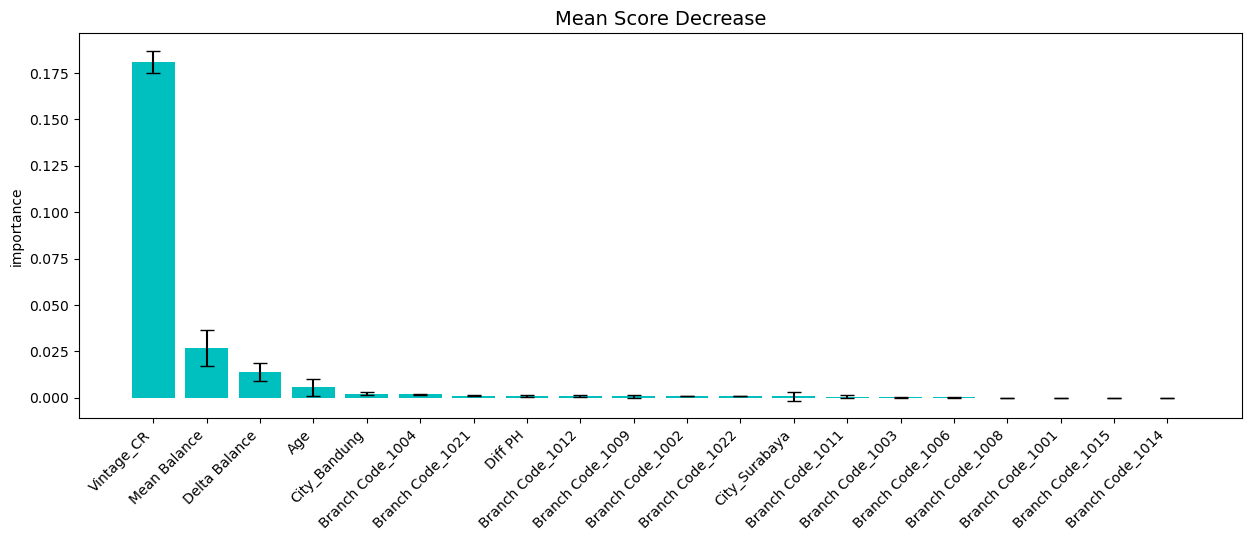

In [157]:
df_imp1 = mean_score_decrease(X1_train, y1_train, grid, plot=True, topk=20)

Experiment 2

In [158]:
y2_pred = grid2.predict(X2_test)

In [159]:
print(f'Accuracy: {metrics.accuracy_score(y1_test, y2_pred)}')
print(f'Recall: {metrics.recall_score(y2_test, y2_pred)}')

Accuracy: 0.757602468047598
Recall: 0.4240924092409241


In [161]:
y2_pred_val = grid2.predict(X2_val)

In [162]:
print(f'Accuracy: {metrics.accuracy_score(y2_val, y2_pred_val)}')
print(f'Recall: {metrics.recall_score(y2_val, y2_pred_val)}')

Accuracy: 0.6418463166247851
Recall: 0.23292727943890734


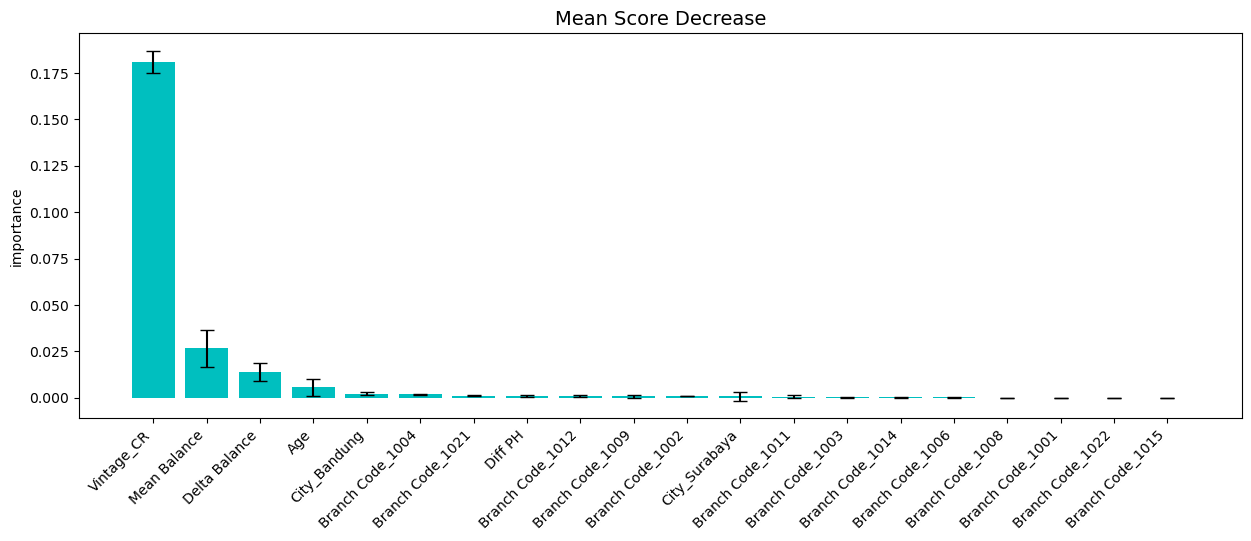

In [163]:
df_imp2 = mean_score_decrease(X2_train, y2_train, grid2, plot=True, topk=20)

# Gradient Boosting

Experiment 1

In [164]:
y1_gb_pred = gb_grid.predict(X1_test)

In [165]:
print(f'Accuracy: {metrics.accuracy_score(y1_test, y1_gb_pred)}')
print(f'Recall: {metrics.recall_score(y1_test, y1_gb_pred)}')

Accuracy: 0.7223446452181578
Recall: 0.5066006600660066


In [166]:
y1_gb_pred_val = gb_grid.predict(X1_val)

In [167]:
print(f'Accuracy: {metrics.accuracy_score(y1_val, y1_gb_pred_val)}')
print(f'Recall: {metrics.recall_score(y1_val, y1_gb_pred_val)}')

Accuracy: 0.6237270202354186
Recall: 0.32041343669250644


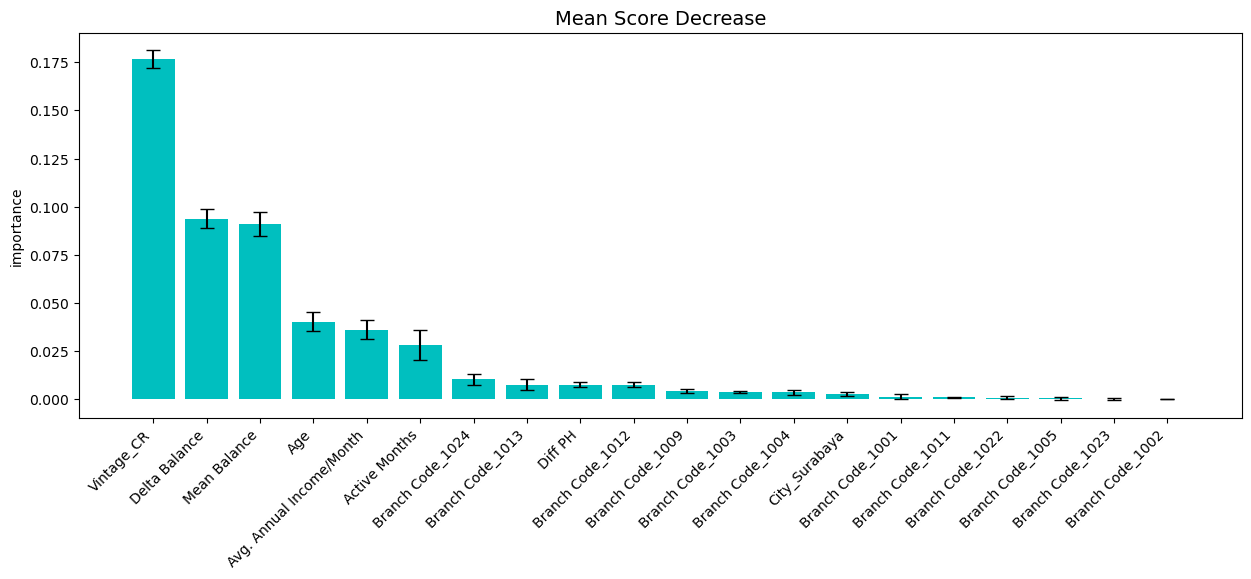

In [168]:
df_imp3 = mean_score_decrease(X1_train, y1_train, gb_grid, plot=True, topk=20)

Experiment 2

In [169]:
y2_gb_pred = gb_grid2.predict(X2_test)

In [170]:
print(f'Accuracy: {metrics.accuracy_score(y2_test, y2_gb_pred)}')
print(f'Recall: {metrics.recall_score(y2_test, y2_gb_pred)}')

Accuracy: 0.7223446452181578
Recall: 0.5066006600660066


In [171]:
y2_gb_pred_val = gb_grid2.predict(X2_val)

In [172]:
print(f'Accuracy: {metrics.accuracy_score(y2_val, y2_gb_pred_val)}')
print(f'Recall: {metrics.recall_score(y2_val, y2_gb_pred_val)}')

Accuracy: 0.6254463695278403
Recall: 0.31893687707641194


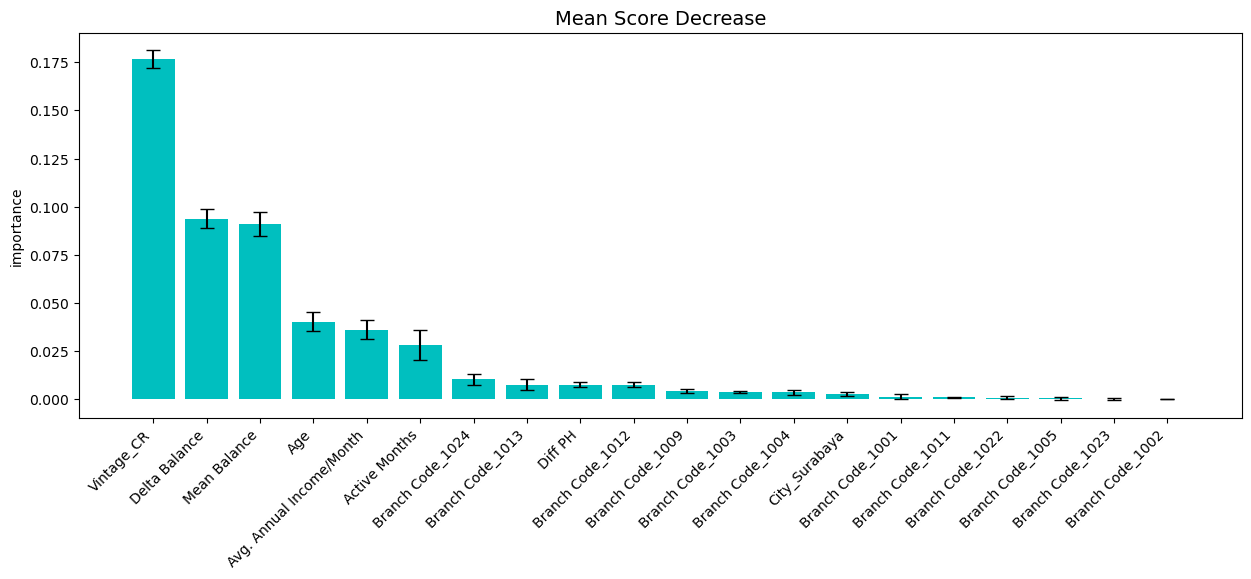

In [173]:
df_imp4 = mean_score_decrease(X2_train, y2_train, gb_grid2, plot=True, topk=20)

# Random Forest

Experiment 1

In [174]:
y1_rf_pred = rf_grid.predict(X1_test)

In [175]:
print(f'Accuracy: {metrics.accuracy_score(y1_test, y1_rf_pred)}')
print(f'Recall: {metrics.recall_score(y1_test, y1_rf_pred)}')

Accuracy: 0.8104892022917585
Recall: 0.3217821782178218


In [176]:
y1_rf_pred_val = rf_grid.predict(X1_val)

In [177]:
print(f'Accuracy: {metrics.accuracy_score(y1_val, y1_rf_pred_val)}')
print(f'Recall: {metrics.recall_score(y1_val, y1_rf_pred_val)}')


Accuracy: 0.666578494908081
Recall: 0.17755629383536362


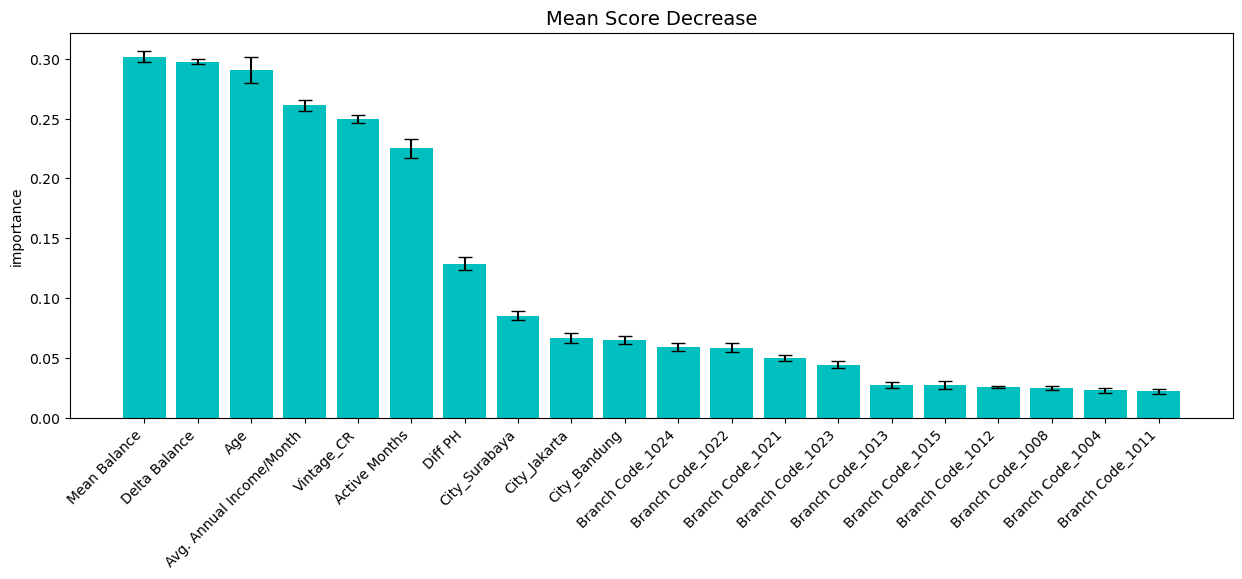

In [178]:
df_imp5 = mean_score_decrease(X1_train, y1_train, rf_grid, plot=True, topk=20)

Experiment 2

In [179]:
y2_rf_pred = rf_grid2.predict(X2_test)

In [180]:
print(f'Accuracy: {metrics.accuracy_score(y2_test, y2_rf_pred)}')
print(f'Recall: {metrics.recall_score(y2_test, y2_rf_pred)}')

Accuracy: 0.8078448655795505
Recall: 0.3316831683168317


In [181]:
y2_rf_pred_val = rf_grid2.predict(X2_val)

In [182]:
print(f'Accuracy: {metrics.accuracy_score(y2_val, y2_rf_pred_val)}')
print(f'Recall: {metrics.recall_score(y2_val, y2_rf_pred_val)}')

Accuracy: 0.6676365560111096
Recall: 0.17238833517903285


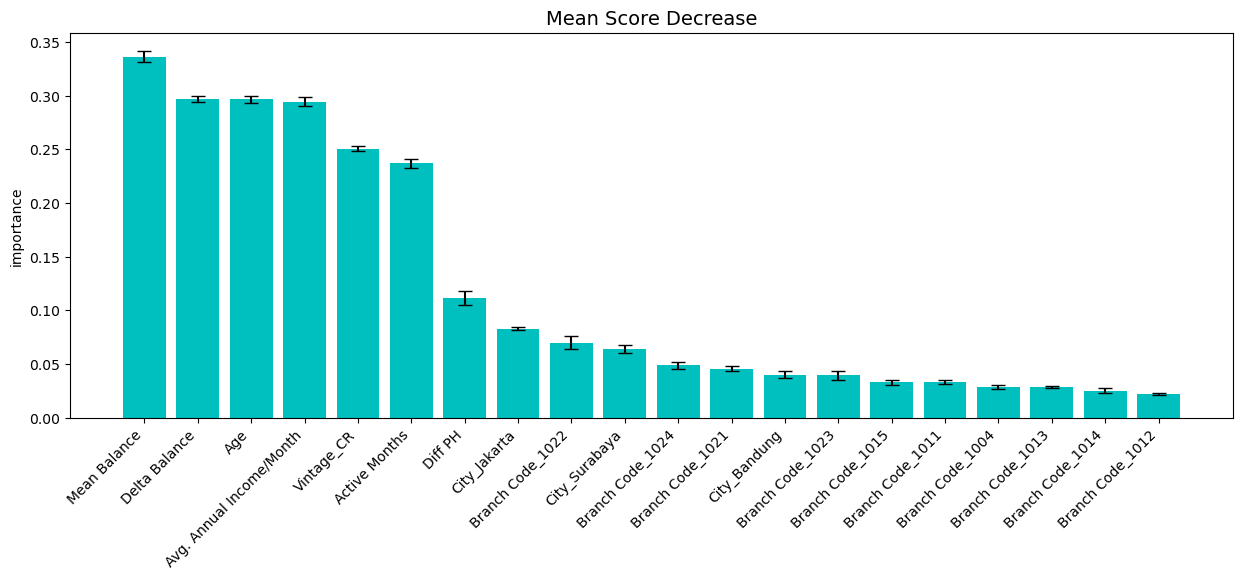

In [183]:
df_imp6 = mean_score_decrease(X2_train, y2_train, rf_grid2, plot=True, topk=20)

# **Conclusion**
All models have accuracy more than 60% but have recall below 40%. This means there are still many customer who have potention to be failed to pay but predicted will not failed to pay. So, from model iteration, can be concluded that the objective has not reached yet.

Here are solutions can be done in the future:
1. Adding more samples
2. Do oversampling to the minority classes (failed to pay) so that model building won't bias
3. Expand time horizon
4. Try another variables variations
5. Try expand hyperparameters in building the model
6. Try another supervised machine learning algorithms